In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
import string
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
    
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Embedding, GRU, LSTM, SimpleRNN, Conv1D, Dense, Dropout, Attention, Bidirectional
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

import nltk
nltk.download('stopwords')
log_dir = "logs/"  # Especifique o diretório onde os logs serão armazenados
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gyova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df = pd.read_csv('../data/dataset1.csv')
df = df.drop(columns=['index'])
df.isnull().any()

label                False
preprocessed_news    False
dtype: bool

In [50]:
stop_words = set(stopwords.words('portuguese'))

def remover_stop_words(news):
    palavras = news.split()
    palavras_sem_stop = [palavra for palavra in palavras if palavra.lower() not in stop_words]
    return ' '.join(palavras_sem_stop)

def review_cleaning(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["preprocessed_news"] = df["preprocessed_news"].apply(remover_stop_words)
df['label'] = df.apply(lambda row: 0 if row.label == 'fake' else 1, axis=1)
X = df.drop(['label'], axis = 1)
Y = df['label']


In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)
X_train = X_train['preprocessed_news'].apply(lambda x: x.lower())
X_test = X_test['preprocessed_news'].apply(lambda x: x.lower())

In [104]:
#variaveis dos modelos
maxlen=350
num_words = 8000
batch_size = 128 
epochs = 20 
validation_fraction = 0.2
output_dim = 64



early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [105]:
train_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>',num_words=num_words)
train_tokenizer.fit_on_texts(X_train.values)
train_word_index = train_tokenizer.word_index
train_sequences = train_tokenizer.texts_to_sequences(X_train)

text_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>',num_words=num_words)
text_tokenizer.fit_on_texts(X_test.values)
text_word_index = text_tokenizer.word_index
text_sequences = text_tokenizer.texts_to_sequences(X_test)

vocab_length = len(train_word_index) + 1

train_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=maxlen)
test_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen=maxlen)

train_padded_seqeunces = train_padded_seqeunces[:, :, tf.newaxis]
test_padded_seqeunces = test_padded_seqeunces[:, :, tf.newaxis]

x_train_padded_seqeunces = train_padded_seqeunces[:, :, tf.newaxis]
x_test_padded_seqeunces = test_padded_seqeunces[:, :, tf.newaxis]

vectorizer = CountVectorizer(max_features=num_words)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train).toarray()

vectorizer = CountVectorizer(max_features=num_words)
vectorizer.fit(X_test)
X_test = vectorizer.transform(X_test).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

#### MLP

Modelo Multi Layers Perceptron
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=30, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 1/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=30, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.968 total time= 1.3min
[CV 2/3; 1/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=30, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 1/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=30, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.965 total time= 1.3min
[CV 3/3; 1/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=30, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 1/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=30, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.962 total time= 1.3min
[CV 1/3; 2/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 2/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.968 total time=  58.0s
[CV 2/3; 2/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 2/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.967 total time=  58.3s
[CV 3/3; 2/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 2/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.963 total time=  59.1s
[CV 1/3; 3/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 3/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.968 total time=  39.3s
[CV 2/3; 3/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 3/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.965 total time=  39.1s
[CV 3/3; 3/3] START activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 3/3] END activation=logistic, alpha=0.0001, batch_size=128, hidden_layer_sizes=10, learning_rate=adaptive, learning_rate_init=0.002, max_iter=256, solver=sgd, validation_fraction=0.2;, score=0.963 total time=  39.6s


c:\Users\gyova\Documents\Projetos\Model-dectation-fake-news\ven\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(


Fim do treinamento MLP

Melhores parametros : {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 128, 'hidden_layer_sizes': 20, 'learning_rate': 'adaptive', 'learning_rate_init': 0.002, 'max_iter': 256, 'solver': 'sgd', 'validation_fraction': 0.2}
Train accuracy: 0.9658730158730159
Test accuracy: 0.7356481481481482

Salvando modelo
Inicio do Teste
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1080
           1       1.00      0.47      0.64      1080

    accuracy                           0.74      2160
   macro avg       0.83      0.74      0.72      2160
weighted avg       0.83      0.74      0.72      2160

Matriz de confusão


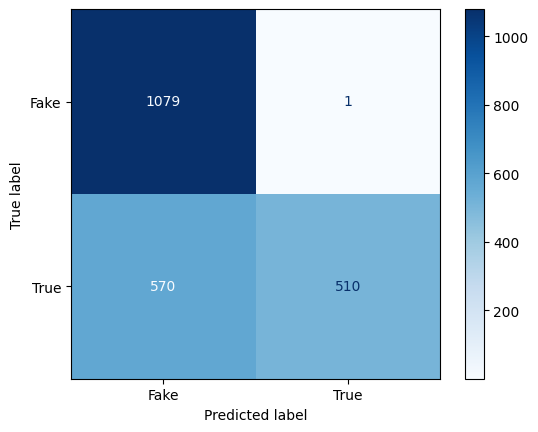

Fim do Teste


In [90]:
print("=" * 20)
print("Modelo Multi Layers Perceptron")

parameters = {'solver': ['sgd', 'lbfgs'],
              'hidden_layer_sizes':[(30, 20, 10)],
              'random_state':[2],
              'activation':  ['relu', 'tanh', 'logistic'],
              'max_iter': [400],
              'alpha': [0.0001, 0.001, 0.01],
              "batch_size" : [128],
              "learning_rate_init": [0.002],
              'learning_rate': ['adaptive','constant'],
              "validation_fraction":[0.2],
              }

param = {'activation': ['logistic'], 'alpha': [0.0001], 'batch_size': [128], 'hidden_layer_sizes': (30, 20, 10), 'learning_rate': ['adaptive'],
                                               'learning_rate_init': [0.002], 'max_iter': [maxlen], 'solver': ['sgd'], 'validation_fraction': [validation_fraction]}

clf = GridSearchCV(MLPClassifier(), param, cv=3, verbose=10)
mlp_hist = clf.fit(X_train,y_train)
mlpG_train = round(clf.score(X_train, y_train) * 100, 2)

print("Fim do treinamento MLP")

print()
print("Melhores parametros :", mlp_hist.best_params_)
print("Train accuracy:", mlp_hist.best_score_)
print("Test accuracy:", mlp_hist.best_estimator_.score(X_test, y_test))
print()

print("Salvando modelo")
with open('../models/MLPClassifierWithGridSearchCV.pkl', 'wb') as arquivo:
    pickle.dump(clf, arquivo)
print("Inicio do Teste")
y_test_pred = clf.predict(X_test)
y_test_pred = (y_test_pred > 0.70)
mlp_acc = round(accuracy_score(y_test, y_test_pred), 2)

cm = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

print("=" * 20)
print("Matriz de confusão")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True'])
disp.plot(cmap='Blues', values_format='.0f')
plt.savefig('../matriz/confusion_matrix_MLP.png')
plt.show()
print("Fim do Teste")




In [92]:
print("Número total de iterações:", len(mlp_hist.cv_results_['params']))


Número total de iterações: 3


Matriz de confusão


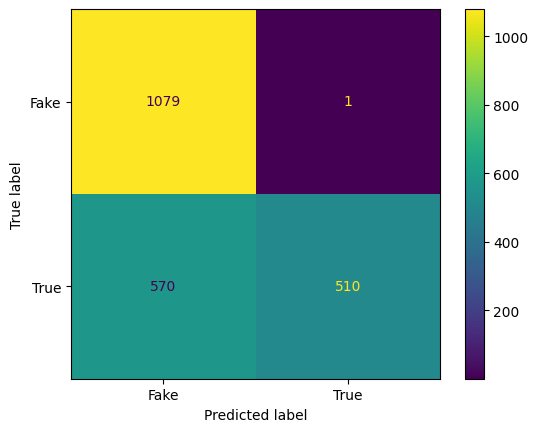

Fim do Teste


In [93]:
print("=" * 20)
print("Matriz de confusão")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake','True'])
disp.plot(values_format='.0f')
plt.savefig('../matriz/confusion_matrix_MLP.png')
plt.show()
print("Fim do Teste")

#### RNN (LSTM bidirecionais)

In [63]:
print("=" * 20)
print("Modelo RNN (LSTM bidirecionais)")

modelLSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, output_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print('Summary do modelo RNN (LSTM bidirecionais) ')
modelLSTM.summary()
print()
# Função para contar iterações
class BatchCounter(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.batch_count = 0

    def on_batch_end(self, batch, logs=None):
        self.batch_count += 1
batch_counter_callback = BatchCounter()


print("Inciando do treinamento")
historyLSTM = modelLSTM.fit(train_padded_seqeunces, y_train, epochs=epochs, validation_split=0.3, callbacks=[early_stopping,tensorboard_callback,batch_counter_callback])
print("Fim do treinamento")

LSTM_train = round(historyLSTM.history['accuracy'][-1] * 100, 2)

print("Salvando modelo")
modelLSTM.save('../models/modelLSTMV2.keras', save_format='tf')


Modelo RNN (LSTM bidirecionais)
Summary do modelo RNN (LSTM bidirecionais) 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 256, 64)           4398592   
                                                                 
 bidirectional_15 (Bidirect  (None, 256, 100)          46000     
 ional)                                                          
                                                                 
 bidirectional_16 (Bidirect  (None, 256, 40)           19360     
 ional)                                                          
                                                                 
 bidirectional_17 (Bidirect  (None, 20)                4080      
 ional)                                                          
                                                                 
 dense_10 (Dense)            (None, 5)      

Total de iterações: 111
Inicio do Teste
68/68 [==============================] - 4s 58ms/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1080
           1       0.97      0.90      0.93      1080

    accuracy                           0.93      2160
   macro avg       0.93      0.93      0.93      2160
weighted avg       0.93      0.93      0.93      2160

Matriz de confusão


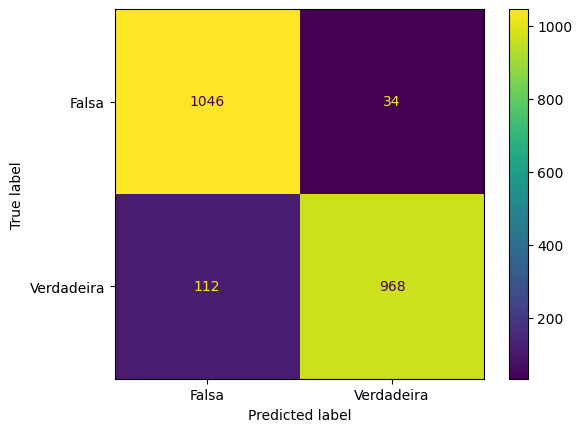

Fim dos testes


In [114]:
print(f'Total de iterações: {batch_counter_callback.batch_count}')

print("Inicio do Teste")

y_test_pred = modelLSTM.predict(test_padded_seqeunces)
y_test_pred = (y_test_pred > 0.70)
lstm_acc = round(accuracy_score(y_test, y_test_pred) * 100, 2)

cm = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

print("Matriz de confusão")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Falsa','Verdadeira'], )
disp.plot(values_format='.0f')
plt.savefig('../matriz/confusion_matrix_LSTM.png')
plt.show()

print("Fim dos testes")

print("=" * 30)




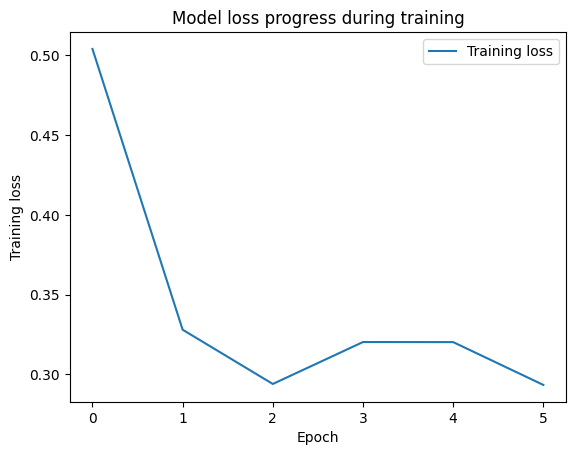

In [65]:
plt.plot(historyLSTM.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])
plt.savefig('../graficos/loss_lstmV2.png')

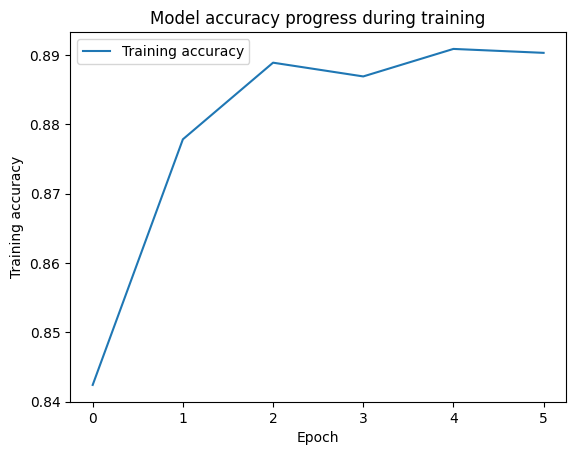

In [66]:
plt.plot(historyLSTM.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])
plt.savefig('../graficos/accuracy_lstmV2.png')

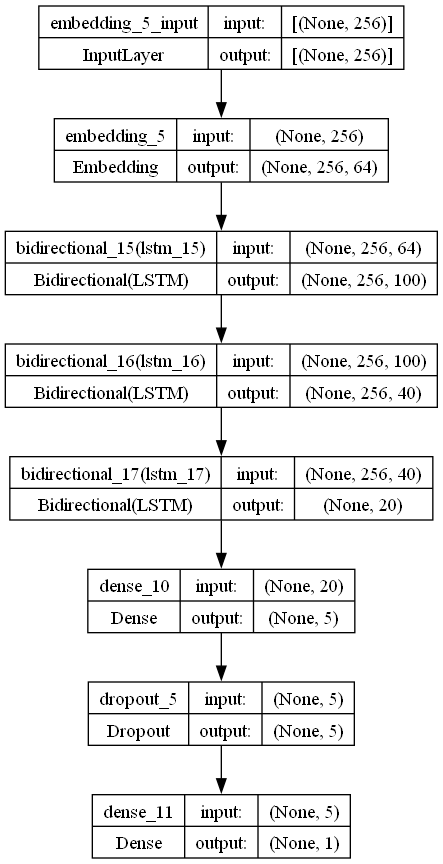

In [67]:
plot_model(modelLSTM, to_file='../summery/lstm.png', show_shapes=True, show_layer_names=True)

#### RNN (HAN)

In [103]:
print("=" * 20)
print("Modelo RNN (HAN)")


def word_attention(x):
    return Attention()([x, x])

def sentence_attention(x):
    return Attention()([x, x])

document_input = Input(shape=(maxlen,))
word_embedding = Embedding(vocab_length, output_dim, input_length=maxlen)(document_input)
word_lstm = Bidirectional(LSTM(50, return_sequences=True))(word_embedding)
word_attention = word_attention(word_lstm)
sentence_lstm = Bidirectional(LSTM(20, return_sequences=True))(word_attention)
sentence_attention = sentence_attention(sentence_lstm)
doc_lstm = Bidirectional(LSTM(10))(sentence_attention)
dense_layer = Dense(5, activation='relu')(doc_lstm)
dropout_layer = tf.keras.layers.Dropout(0.5)(dense_layer)
output = Dense(1, activation='sigmoid')(dropout_layer)

model_han = tf.keras.Model(inputs=document_input, outputs=output)
model_han.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print('Summary do modelo RNN (LSTM bidirecionais) ')
model_han.summary()
print()

print("Inciando do treinamento")
historyHAN = model_han.fit(train_padded_seqeunces, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping,tensorboard_callback])
print("Fim do treinamento")

HAN_train = round(historyHAN.history['accuracy'][-1] * 100, 2)

print("Salvando modelo")

#model_han.save('../models/modelHAN.keras', save_format='tf')



Modelo RNN (HAN)
Summary do modelo RNN (LSTM bidirecionais) 
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256)]                0         []                            
                                                                                                  
 embedding_12 (Embedding)    (None, 256, 64)              4398592   ['input_7[0][0]']             
                                                                                                  
 bidirectional_36 (Bidirect  (None, 256, 100)             46000     ['embedding_12[0][0]']        
 ional)                                                                                           
                                                                                                  
 attention_12 (Attention)    (N

Inicio do Teste
68/68 [==============================] - 6s 84ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1080
           1       0.93      0.90      0.91      1080

    accuracy                           0.92      2160
   macro avg       0.92      0.92      0.92      2160
weighted avg       0.92      0.92      0.92      2160

Matriz de confusão


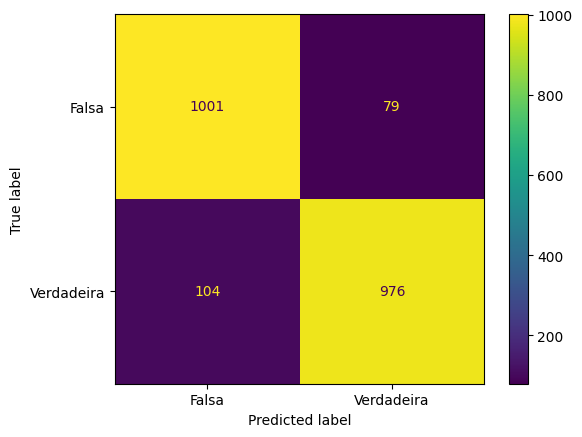

Fim dos testes


In [115]:

print("Inicio do Teste")
y_test_pred = model_han.predict(test_padded_seqeunces)
y_test_pred = (y_test_pred > 0.70)
han_acc = round(accuracy_score(y_test, y_test_pred) * 100, 2)

cm = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

print("Matriz de confusão")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Falsa','Verdadeira'], )
disp.plot(values_format='.0f')
plt.savefig('../matriz/confusion_matrix_HAN.png')
plt.show()

print("Fim dos testes")


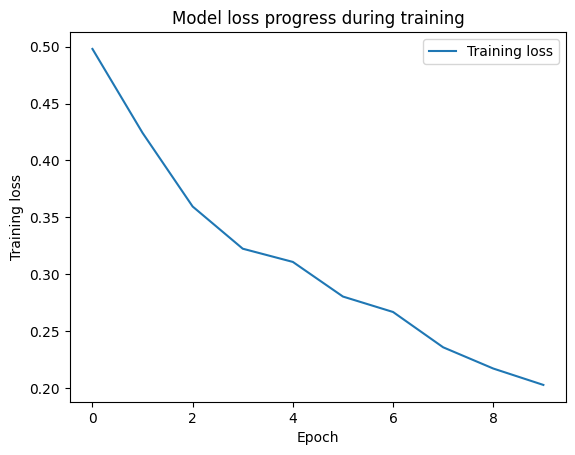

In [108]:

print("=" * 30)

plt.plot(historyHAN.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])
plt.savefig('../graficos/loss_han.png')



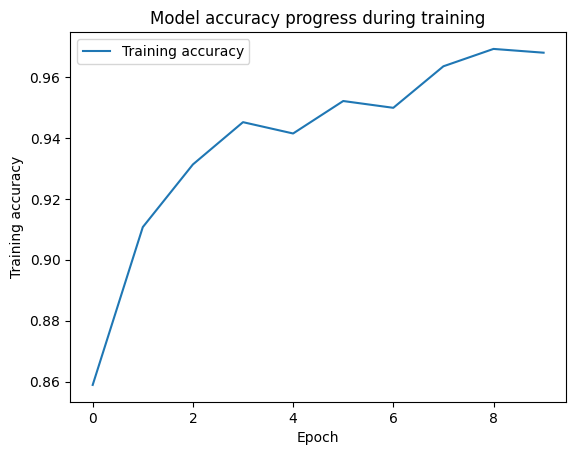

In [109]:

plt.plot(historyHAN.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])
plt.savefig('../graficos/accuracy_han.png')



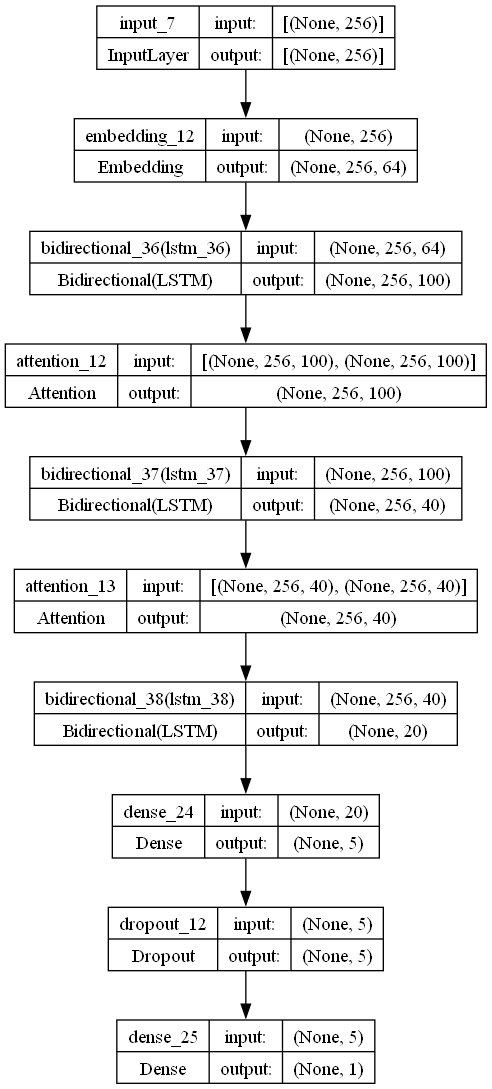

In [110]:
plot_model(model_han, to_file='../summery/han.png', show_shapes=True, show_layer_names=True)

## resultado

In [130]:
mlp_acc

0.74

In [150]:
mlpG_train =  round(mlp_hist.best_score_ * 100, 0)
mlp_acc =  round(mlp_hist.best_estimator_.score(X_test, y_test) * 100, 0)
LSTM_train = round(historyLSTM.history['accuracy'][-1] * 100, 0)
lstm_acc = round(accuracy_score(y_test, y_test_pred) * 100, 0)
HAN_train = round(historyHAN.history['accuracy'][-1] * 100, 0)
han_acc = round(accuracy_score(y_test, y_test_pred) * 100, 0)


In [151]:
model = pd.DataFrame({
    'Model': [
        'MLP',
        'RNN LSTM(BI)',
        'HAN'
    ],
    'Train Accuracy Score': [
        
        mlpG_train ,LSTM_train,HAN_train
    ],
    'Test Accuracy': [
        
        mlp_acc ,lstm_acc,han_acc
    ]
})

In [152]:
Train = model.sort_values('Test Accuracy',ascending=False)
Train

,Model,Train Accuracy Score,Test Accuracy
1,RNN LSTM(BI),89.0,92.0
2,HAN,97.0,92.0
0,MLP,97.0,74.0
